<a href="https://colab.research.google.com/github/neel26desai/cmpe255_clustering/blob/main/DocumentClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
from sklearn.cluster import KMeans
from transformers import AutoTokenizer, AutoModel
import torch


In [14]:
#loading
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")


In [15]:
documents = [
    "The quick brown fox jumps over the lazy dog.",
    "The cat sat on the mat.",
    "The dog chased the cat.",
    "The bird flew in the sky.",
    "The fish swam in the sea.",
    "The sun shone brightly.",
    "The moon glowed softly.",
    "The stars twinkled in the night sky.",
    "The wind blew gently.",
    "The rain fell softly.",
    "The snow fell heavily.",
    "The ice was cold and hard.",
    "The fire was warm and inviting.",
    "The water was cool and refreshing.",
    "The air was fresh and clean.",
    "The earth was green and lush.",
    "The sky was blue and clear.",
    "The clouds were white and fluffy.",
    "The mountains were tall and majestic.",
    "The valleys were deep and serene.",
    "The forests were dark and mysterious.",
    "The deserts were hot and dry.",
    "The oceans were vast and deep.",
    "The rivers were long and winding.",
    "The lakes were still and calm.",
    "The waterfalls were powerful and majestic.",
    "The animals were wild and free.",
    "The plants were green and growing.",
    "The flowers were colorful and fragrant.",
    "The trees were tall and strong.",
    "The houses were big and sturdy.",
    "The cars were fast and sleek.",
    "The airplanes were high and fast.",
    "The boats were big and strong.",
    "The submarines were deep and mysterious.",
    "The spaceships were fast and futuristic.",
    "The robots were strong and helpful.",
    "The computers were fast and powerful.",
    "The internet was vast and global.",
    "The world was big and beautiful.",
    "The universe was vast and mysterious.",
    "The future was bright and hopeful.",
    "The past was dark and mysterious.",
    "The present is a gift.",
    "Life is precious.",
    "Love is beautiful.",
    "Hope is strong.",
    "Faith is powerful.",
    "Peace is precious.",
    "Freedom is important.",
    "Justice is blind.",
    "Truth is eternal.",
    "Beauty is in the eye of the beholder.",
    "Love is the answer.",
    "There is no place like home.",
    "Home is where the heart is.",
    "Charity begins at home.",
    "A bird in the hand is worth two in the bush.",
    "All that glitters is not gold.",
    "A stitch in time saves nine.",
    "A penny saved is a penny earned.",
    "Two wrongs don't make a right.",
    "Haste makes waste.",
    "Look before you leap.",
    "Easy come, easy go.",
    "The early bird gets the worm.",
    "A rolling stone gathers no moss.",
    "There's no time like the present.",
    "Make hay while the sun shines.",
    "All good things must come to an end.",
    "Every cloud has a silver lining.",
    "When the going gets tough, the tough get going.",
    "Necessity is the mother of invention.",
    "Laughter is the best medicine.",
    "A friend in need is a friend indeed.",
    "Blood is thicker than water.",
    "Home is where the heart is.",
    "There's no place like home.",
    "Charity begins at home.",
    "A bird in the hand is worth two in the bush.",
    "All that glitters is not gold.",
    "A stitch in time saves nine.",
    "A penny saved is a penny earned.",
    "Two wrongs don't make a right.",
    "Haste makes waste.",
    "Look before you leap.",
    "Easy come, easy go.",
    "The early bird gets the worm.",
    "A rolling stone gathers no moss.",
    "There's no time like the present.",
    "Make hay while the sun shines.",
    "All good things must come to an end.",
    "Every cloud has a silver lining.",
    "When the going gets tough, the tough get going.",
    "Necessity is the mother of invention.",
    "Laughter is the best medicine.",
    "A friend in need is a friend indeed.",
    "Blood is thicker than water.",
]


In [16]:
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

embeddings = np.array([get_embedding(doc) for doc in documents])


In [36]:
embeddings

array([[[-0.0144665 , -0.07488798,  0.05636835, ..., -0.2625465 ,
          0.49536896,  0.07398007]],

       [[-0.18180333, -0.26617852, -0.2188662 , ..., -0.1475547 ,
          0.4014612 , -0.03504107]],

       [[ 0.03199036, -0.12704226, -0.15073356, ..., -0.29676077,
          0.51143605,  0.07649407]],

       ...,

       [[ 0.21586642,  0.12286804,  0.0689448 , ...,  0.09936311,
          0.19486126,  0.08864466]],

       [[-0.22105937,  0.05188395,  0.23734316, ..., -0.00104124,
         -0.33271602,  0.3125489 ]],

       [[ 0.4472755 , -0.13830869,  0.09058813, ..., -0.08995704,
         -0.12312365,  0.34946948]]], dtype=float32)

In [17]:
from sklearn.cluster import DBSCAN

In [31]:
# Calculate sum of squared distances for k=1 to k=10
kmeans_clusers =[]
sum_of_squared_distances = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(embeddings.squeeze())
    kmeans_clusers.append(km)
    sum_of_squared_distances.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

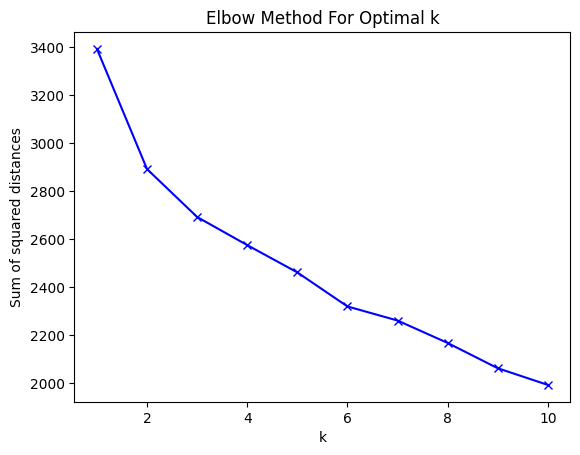

In [32]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


lets use cluster where number of clusters is equal to 6

In [8]:
from sklearn.decomposition import PCA

In [11]:
from matplotlib import pyplot as plt

In [20]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings.squeeze())


In [34]:
clusters = kmeans_clusers[5].predict(embeddings.squeeze())

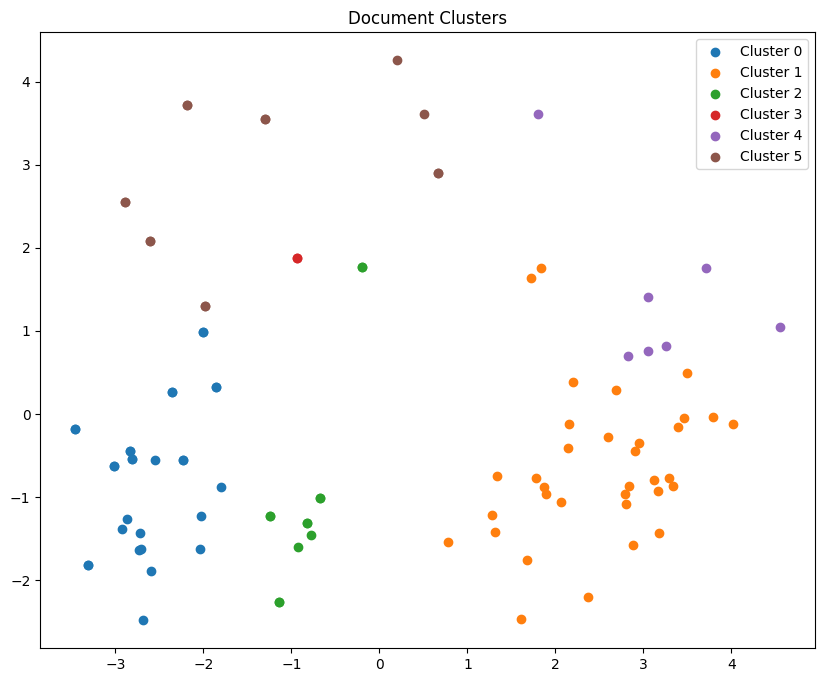

In [35]:
plt.figure(figsize=(10, 8))
for i in range(6):
    plt.scatter(reduced_embeddings[clusters == i, 0], reduced_embeddings[clusters == i, 1], label=f"Cluster {i}")
plt.title("Document Clusters")
plt.legend()
plt.show()


In [38]:
type(embeddings)

numpy.ndarray

In [40]:
from sklearn import metrics



silhouette = metrics.silhouette_score(embeddings.squeeze(), clusters)
calinski_harabasz = metrics.calinski_harabasz_score(embeddings.squeeze(), clusters)
davies_bouldin = metrics.davies_bouldin_score(embeddings.squeeze(), clusters)

# Silhouette Coefficient
print(f"Silhouette Coefficient: {silhouette:.3f}")

# Calinski-Harabasz Index
print(f"Calinski-Harabasz Index: {calinski_harabasz:.3f}")

# Davies-Bouldin Index
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")



Silhouette Coefficient: 0.151
Calinski-Harabasz Index: 8.501
Davies-Bouldin Index: 2.005
